# Implementation student performance with linear regression algorithm

In [1]:
import numpy as np                # Library untuk komputasi python 
import pandas as pd               # Library untuk ETL Python 
import matplotlib.pyplot as plt   # Library untuk visualisasi data python 
import seaborn as sns             # Library untuk visualisasi data python 
from scipy.stats import norm      # Library untuk statistika python 
from sklearn import linear_model  # Library untuk model Regresi Linier 
from sklearn.model_selection import train_test_split # library untuk membagi data training dan testing 
from sklearn import metrics       # Library untuk pengukuran kinerja model 
from sklearn.preprocessing import LabelEncoder # Library untuk encoder data kategorik 

%matplotlib inline 
sns.set(color_codes=True)
sns.set_theme(style="whitegrid")
plt.style.use('bmh')

## Load and Information Datasheet

In [2]:
# Load datasheet dan tampilkan 5 data teratas dan terakhir 
data_siswa = pd.read_csv("datasheet/StudentsPerformance.csv")
data_siswa.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# tampilkan 5 data terkahir 
data_siswa.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<ul>
    <li><h3>Insight</h3></li>
    <p> terlihat bahwa 5 data teratas dan terakhir pada datasheet yang kita gunakan memiliki fitur yang beragam</p>
    <p> pada tahap ini mempelajari informasi yang ada pada datasheet sebelum diproses lebih lanjut</p>
<ul/>

In [4]:
# proporsi jumlah data dan baris pada datasheet 
print("Proporsi jumlah data dan baris pada datasheet : ", data_siswa.shape)
print("Proporsi jumlah baris pada datasheet : ", data_siswa.shape[0], "baris")
print("Proporsi jumlah kolom pada datasheet : ", data_siswa.shape[1], "kolom")
# tampilkan informasi pada datasheet 
print(data_siswa.info())

Proporsi jumlah data dan baris pada datasheet :  (1000, 8)
Proporsi jumlah baris pada datasheet :  1000 baris
Proporsi jumlah kolom pada datasheet :  8 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


<ul>
    <li>
        <h3>Insight</h3>
        <p>proporsi data yang digunakan sebesar (1000, 8)</p>
        <p>jumlah baris pada data sebanyak 1000 baris</p>
        <p>jumlah kolom pada data sebanyak 8 kolom</p>
    </li>
    <p>dari infomasi yang didapat pada data memliki tipe data object dan int64 dan tidak terdapat nilai null</p>
</ul>

# Exploratory data analysis (EDA)

## Data Preparation

In [5]:
# mengecek kolom yang bernilai kosong 
data_siswa[data_siswa.isna().all(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<ul>
    <li><h3> Insight </h3></li>
    <p>terlihat bahwa datasheet yang kita gunakan tidak memiliki nilai yang missing value sehingga dapat dilanjutkan ke tahap berikut nya</p>
</ul>

### merubah nama fitur pada datasheet 

<p>sebelum dilakukan preprocessing data kita perlu merubah nama tabel agar dapat memudahkan kita memahami data</p>

In [19]:
# ubah nama setiap kolom pada datasheet 
data_siswa = data_siswa.rename(columns={"gender":"jenis kelamin","race/ethnicity":"kelompok",
                                        "parental level of education":"tingkat pendidikan", "lunch":"level",
                                        "test preparation course":"persiapan tes","math score":"nilai matematika",
                                        "reading score":"nilai membaca","writing score":"nilai menulis"})
data_siswa.head()

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Knowladge

### Distribusi Normal pada fitur datasheet 

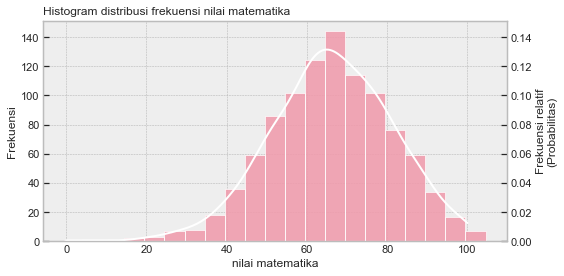

In [107]:
# histogram visualization skor matematika 
fig, ax = plt.subplots(figsize=(8,4))
# histogram untuk frekuensi data skor matematika 
sns.histplot(data_siswa['nilai matematika'], binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min() - 0.5, 
                       data_siswa['nilai matematika'].max() + 0.5), 
             ec="w", color = "crimson", ax=ax)

# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()

sns.histplot(data_siswa['nilai matematika'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai matematika'].min() - 0.5, 
                       data_siswa['nilai matematika'].max() + 0.5), 
             kde=True ,ec="w", color="white", ax=ax1)

ax.set_xlabel("nilai matematika", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi nilai matematika", fontsize=12, loc='left')
plt.tight_layout()
plt.show()

In [35]:
# statistik deskriptif dari nilai matematika 
print("jumlah rata - rata nilai matematika : ", data_siswa['nilai matematika'].mean())
print("nilai tengah dari nilai matematika  : ", data_siswa['nilai matematika'].median())
print("nilai yang paling sering muncul     : ", data_siswa['nilai matematika'].mode())

jumlah rata - rata nilai matematika :  66.089
nilai tengah dari nilai matematika  :  66.0
nilai yang paling sering muncul     :  0    65
dtype: int64


<ul>
    <li>
        <h3>Insight</h3>
    </li>
    <p> 
       dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada ujian matematika sebesar    
       66.089 
    </p>
    <p>
       nilai tengah dari keselurahan data pada kolom nilai matematika sebesar 66.0
    </p>
    <p>
        nilai yang sering muncul pada ujian matematika banyak siswa yang mendapat nilai 0 dan 65 dari keseluruhan data
    </p>
<ul>

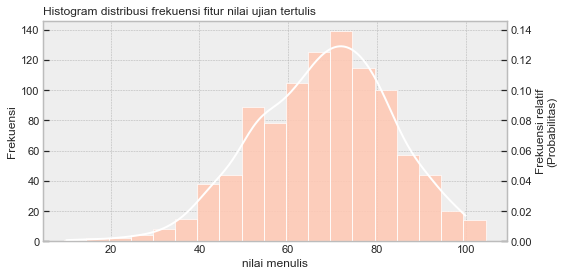

In [98]:
# histogram visualization skor menulis
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai menulis'], binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min()-0.5, 
                       data_siswa['nilai menulis'].max()+0.5), 
             ec="w", color="coral", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai menulis'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai menulis'].min() - 0.5, 
                       data_siswa['nilai menulis'].max() + 0.5), 
             kde=True ,ec="w", color="white", ax=ax1)

ax.set_xlabel("nilai menulis", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi fitur nilai ujian tertulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

In [89]:
# statistik deskriptif kolom nilai ujian tertulis
print("nilai rata - rata dari ujian tertulis        : ", data_siswa['nilai menulis'].mean())
print("nilai tengah dari kolom ujian tertulis       : ", data_siswa['nilai menulis'].median())
print("nilai yang sering muncul dari nilai tertulis : ", data_siswa['nilai menulis'].mode())

nilai rata - rata dari ujian tertulis        :  68.054
nilai tengah dari kolom ujian tertulis       :  69.0
nilai yang sering muncul dari nilai tertulis :  0    74
dtype: int64


<ul>
  <li> 
      <h3>Insight</h3>
  </li>
    <p> 
     dari distribusi normal tersebut dapat diambil kesimpulan bahwa nilai rata - rata siswa pada 
     ujian tertulis sebesar 68.054
    </p>
    <p>
        nilai tengah dari keseluruhan dari ujian tertulis sebesar 69.0
    </p>
    <p>nilai yang sering muncul dari nilai ujian tertulis sebesar 0 dan 74</p>
</ul>

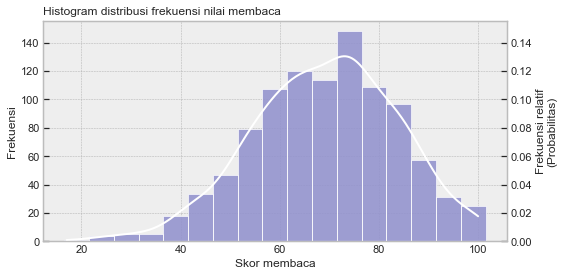

In [100]:
# histogram visualization skor membaca 
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data_siswa['nilai membaca'], binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min()-0.5, 
                       data_siswa['nilai membaca'].max()+0.5), 
             ec="w", color="#00008B", ax=ax)

ax1 = ax.twinx()

sns.histplot(data_siswa['nilai membaca'], stat="probability", binwidth=5, 
             binrange=(data_siswa['nilai membaca'].min() - 0.5, 
                       data_siswa['nilai membaca'].max() + 0.5), kde=True ,
             ec="w", color="white", ax=ax1)

ax.set_xlabel("Skor membaca", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi frekuensi nilai membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

## Distribusi normal komulatif 

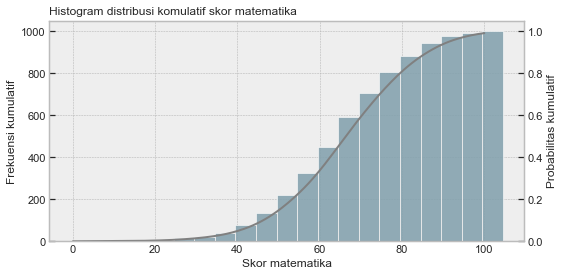

In [10]:
# Distribusi normal komulatif untuk fitur skor matematika 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['skor_matematika'], binwidth=5, 
             binrange=(data_siswa['skor_matematika'].min()-0.5, 
                       data_siswa['skor_matematika'].max()+0.5), 
             cumulative=True, ec="w", color="skyblue", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['skor_matematika'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['skor_matematika'].min()-0.5, 
                       data_siswa['skor_matematika'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="grey", ax=ax1)
# set label
ax.set_xlabel("Skor matematika", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif skor matematika", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

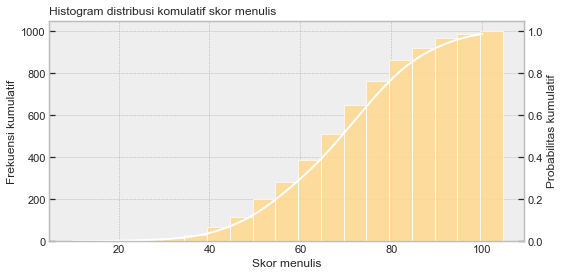

In [11]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['skor_menulis'], binwidth=5, 
             binrange=(data_siswa['skor_menulis'].min()-0.5, 
                       data_siswa['skor_menulis'].max()+0.5), 
             cumulative=True, ec="w", color="orange", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['skor_menulis'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['skor_menulis'].min()-0.5, 
                       data_siswa['skor_menulis'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("Skor menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif skor menulis", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

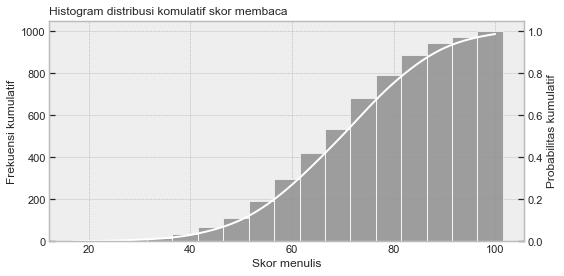

In [12]:
# Distribusi normal komulatif untuk fitur skor menulis 
fig, ax = plt.subplots(figsize=(8, 4))
# plotkan histogram untuk frekuensi 
sns.histplot(data_siswa['skor membaca'], binwidth=5, 
             binrange=(data_siswa['skor membaca'].min()-0.5, 
                       data_siswa['skor membaca'].max()+0.5), 
             cumulative=True, ec="w", color="black", ax=ax)
# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()
# plotkan histogram untuk frekuensi relatif
sns.histplot(data_siswa['skor membaca'], 
             stat="probability", binwidth=5, 
             binrange=(data_siswa['skor membaca'].min()-0.5, 
                       data_siswa['skor membaca'].max()+0.5), 
             cumulative=True, kde=True, ec="w", color="white", ax=ax1)
# set label
ax.set_xlabel("Skor menulis", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.title("Histogram distribusi komulatif skor membaca", fontsize=12, loc="left")
plt.tight_layout()
plt.show()

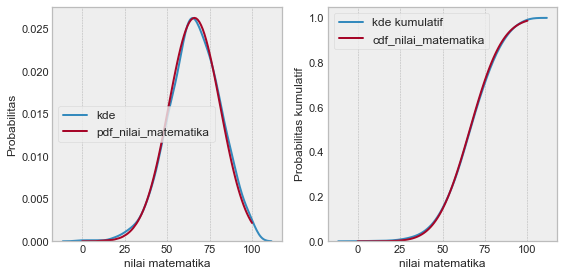

In [113]:
# membuat grafik pdf (probility density function) dan cdf (cumulative density function)
nilai_matematika_mean = data_siswa['nilai matematika'].mean() # buat variabel untuk menghitung nilai mean 
nilai_matematika_std  = data_siswa['nilai matematika'].std()  # buat variabel untuk menghtung nilai standar deviasi 

# perhitungan pdf untuk nilai matematika dengan library scipy 
pdf_nilai_matematika = norm.pdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)
# perthitungan cdf untuk nilai matematika dengan library scipy
cdf_nilai_matematika = norm.cdf(data_siswa['nilai matematika'], loc=nilai_matematika_mean, scale=nilai_matematika_std)

# buat subplots untuk grafik pdf dan cdf
fig, axs = plt.subplots(1, 2,figsize=(8, 4))
# plot grafik untuk pdf 
sns.kdeplot(x =data_siswa['nilai matematika'], lw=2, ax=axs[0])
sns.lineplot(x= data_siswa['nilai matematika'], y = pdf_nilai_matematika, lw=2, ax=axs[0])

# plot grafik untuk cdf
sns.kdeplot (x = data_siswa['nilai matematika'], cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x = data_siswa['nilai matematika'], y = cdf_nilai_matematika, lw=2, ax=axs[1] )

# buat legenda untuk informasi plot 1 dan 2 
axs[0].legend(["kde","pdf_nilai_matematika"], fontsize=12)
axs[1].legend(["kde kumulatif", "cdf_nilai_matematika"], fontsize=12)

# buat plot sumbu y pada plot 1
axs[0].set_ylabel("Probabilitas", fontsize=12)

# buat fungsi perulangan untuk sumbu x pada semua plot
for ax in axs:
    ax.set_xlabel("nilai matematika", fontsize=12) # set font 12 pada sumbu x 
    ax.grid(axis="y") 
ax.set_ylabel("Probabilitas kumulatif", fontsize=12) # set font 12 pada sumbu y

# tampilkan hasil visualisasi 
plt.tight_layout()
plt.show()

In [114]:
data_siswa.head(10)

,jenis kelamin,kelompok,tingkat pendidikan,level,persiapan tes,nilai matematika,nilai membaca,nilai menulis
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


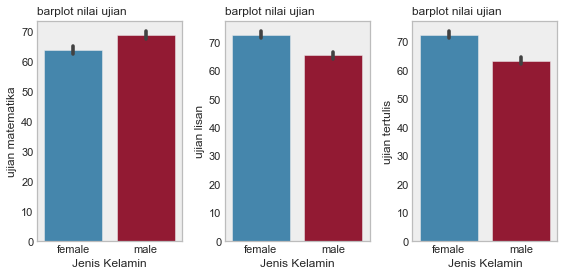

In [76]:
# buat subplots menjadi 3 bagian  
fig, axs = plt.subplots(1, 3, figsize=(8,4))

# visualisasi data jenis kelamin dan nilai matematika 
sns.barplot(x="jenis kelamin", y="nilai matematika", data=data_siswa, ax=axs[0]) # plot 1
sns.barplot(x="jenis kelamin", y="nilai membaca"   , data=data_siswa, ax=axs[1]) # plot 2
sns.barplot(x="jenis kelamin", y="nilai menulis"   , data=data_siswa, ax=axs[2]) # plot 3

# set y label untuk plot 1
axs[0].set_ylabel("ujian matematika", fontsize=12)

# buat perulangan untuk plot ax x label dari 3 bagian visualisasi
for ax in axs:
    ax.set_xlabel("Jenis Kelamin", fontsize=12)
    ax.set_title("barplot nilai ujian", fontsize=12, loc="left")
    ax.grid(axis="y")
    
# set y label untuk plot 2 dan 3
axs[1].set_ylabel("ujian lisan", fontsize=12)
axs[2].set_ylabel("ujian tertulis", fontsize=12)

# tampilkan visualisasi 
plt.tight_layout()
plt.show()

<ul>
    <li>
        <h3>Insight</h3>
    </li> 
</ul>

<AxesSubplot:xlabel='kelompok', ylabel='nilai matematika'>

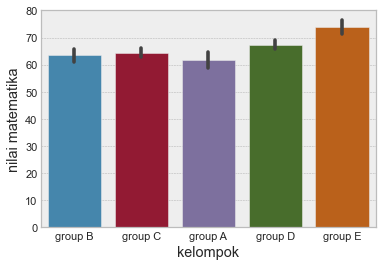

In [48]:
sns.barplot(x="kelompok", y="nilai matematika", data=data_siswa)

<AxesSubplot:xlabel='tingkat pendidikan', ylabel='nilai matematika'>

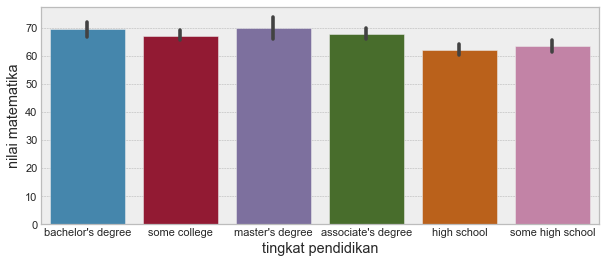

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(x="tingkat pendidikan", y="nilai matematika", data=data_siswa)

## Data Cleaning

In [31]:
# menghapus kolom yang tidak digunakan
data_siswa = data_siswa.drop(['gender','race/ethnicity','parental level of education',
                              'lunch','test preparation course'], axis=1)
data_siswa.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
